In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
class Environment():

    def __init__(self, q_star):
        self.q_star = q_star

    def get_reward(self, action):
        return np.random.normal(self.q_star[action], 5)


In [28]:
class Agent():

    def __init__(self, actions, epsilon = 0.01):
        self.actions = actions
        self.q_estimate = np.zeros(len(actions))
        self.epsilon = epsilon
        self.total_reward = 0

    def take_action(self):
        if np.random.random() < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            action = self.actions[np.argmax(self.q_estimate)]
        return action

    def get_reward_for_action(self, action, reward, N):
        self.total_reward += reward
        self.q_estimate[action] += (1/N)*(reward - self.q_estimate[action])


In [29]:
def episode(agent, environment, iteration):
    history = {
        'time' : [],
        'action' : [],
        'reward' : [],
    }
    for i in range(1,iteration):
      action = agent.take_action()
      reward = environment.get_reward(action)
      agent.get_reward_for_action(action, reward,iteration)
      history['time'].append(i)
      history['action'].append(action)
      history['reward'].append(reward)
    return agent, environment, history

In [49]:
agent1 = Agent([0,1,2,3,4,5,6,7,8,9], epsilon = 0.1)
agent2 = Agent([0,1,2,3,4,5,6,7,8,9], epsilon = 0.05)
environment = Environment({0:6,1:7,2:2,3:5,4:4,5:0,6:1,7:8,8:2,9:1})
agent1, environment, history1 = episode(agent1, environment, 100)
agent2, environment, history2 = episode(agent2, environment, 100)

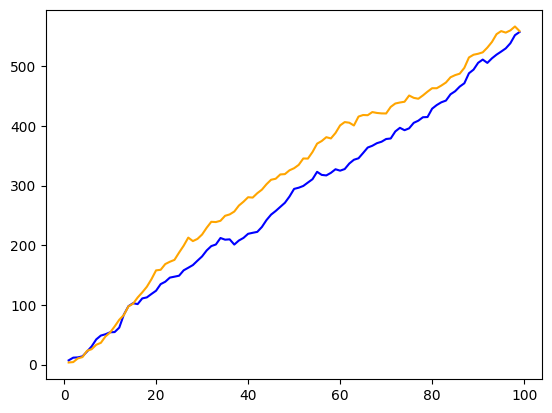

In [50]:
plt.plot(history1.get('time'), np.array(history1.get('reward')).cumsum(),color='blue')
plt.plot(history2.get('time'), np.array(history2.get('reward')).cumsum(),color='orange')